In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [12]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i in np.arange(num_episodes):
        episode_obs = []
        episode_rewards = []
        observation = env.reset()

        for j in np.arange(200):
            action = np.argmax(sample_policy(observation))
            next_observation, reward, done, _ = env.step(action)
            episode_obs.append(observation)
            episode_rewards.append(reward)
            if done:
                break
            observation = next_observation
    
        # find the first occurrence of each observation and calculate the returns
        num_steps = len(episode_obs)
        all_obs = set(episode_obs)
        for ob in all_obs:
            first_index = episode_obs.index(ob)
            len2end = num_steps - first_index  # include the first occurrence
            G = sum([np.power(discount_factor, i) * episode_rewards[first_index + i] for i in np.arange(len2end)])
            returns_sum[ob] += G
            returns_count[ob] += 1.0
    
    for ob in returns_sum.keys():
        V[ob] = returns_sum[ob] / returns_count[ob]

    return V    

In [13]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

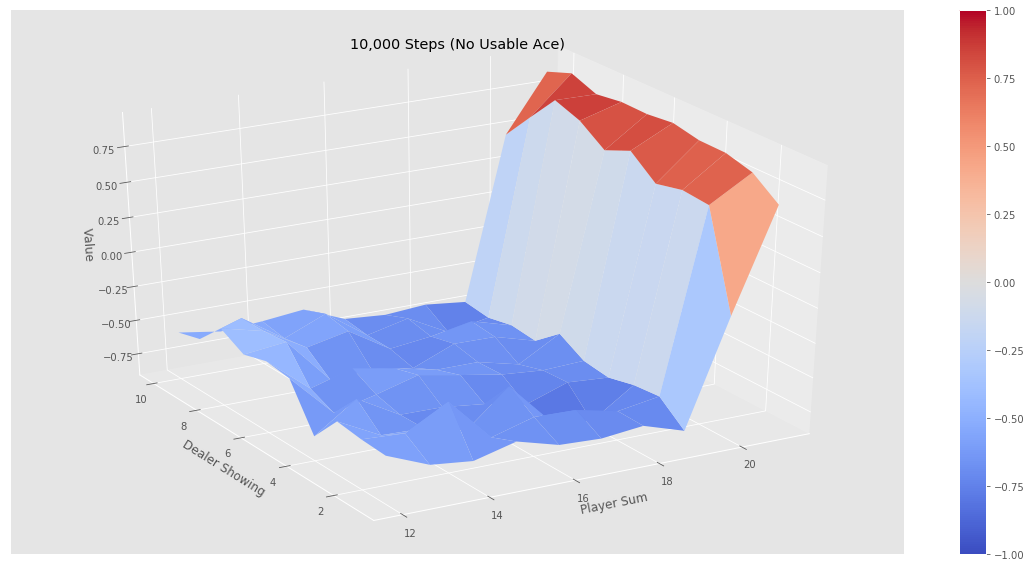

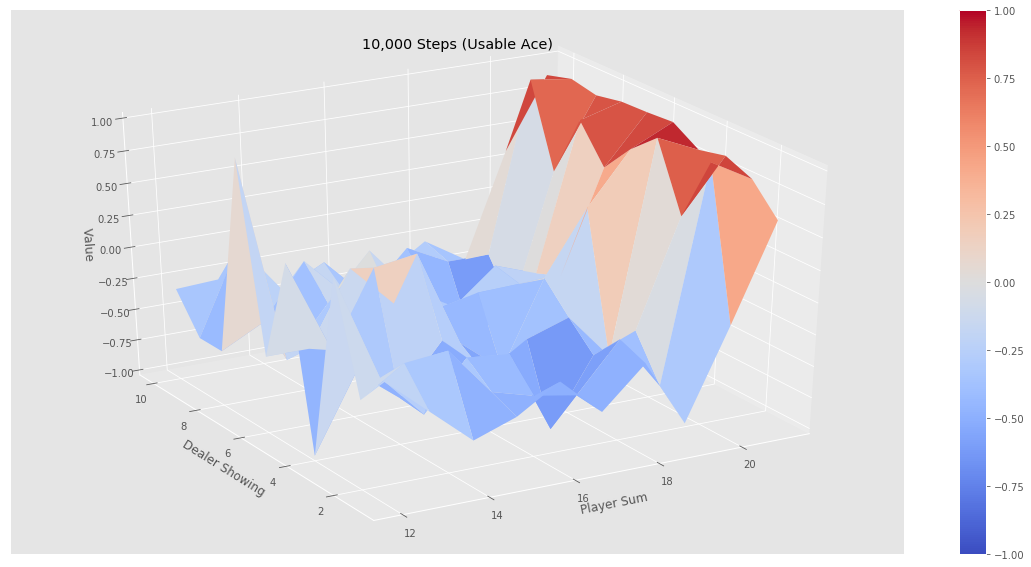

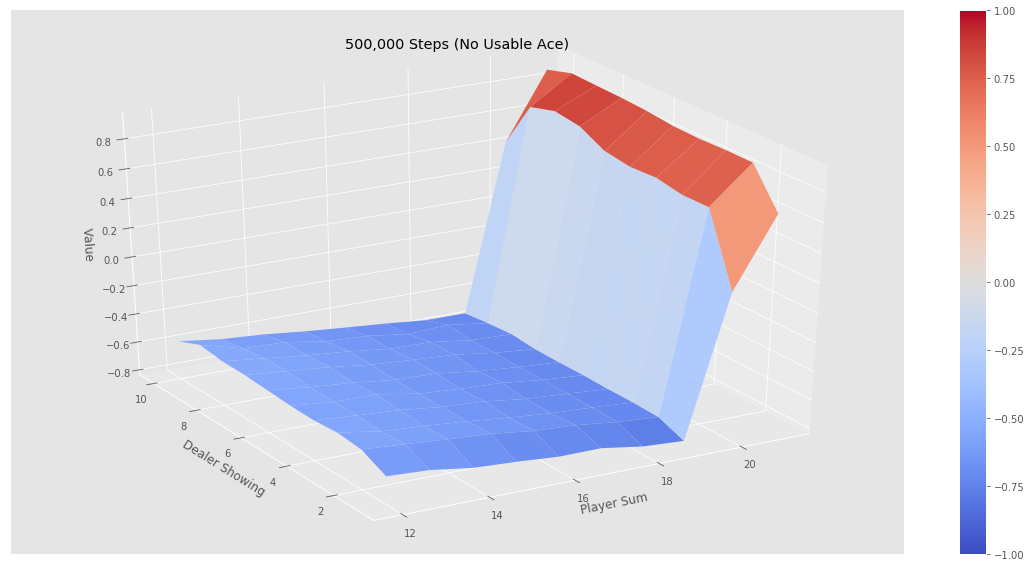

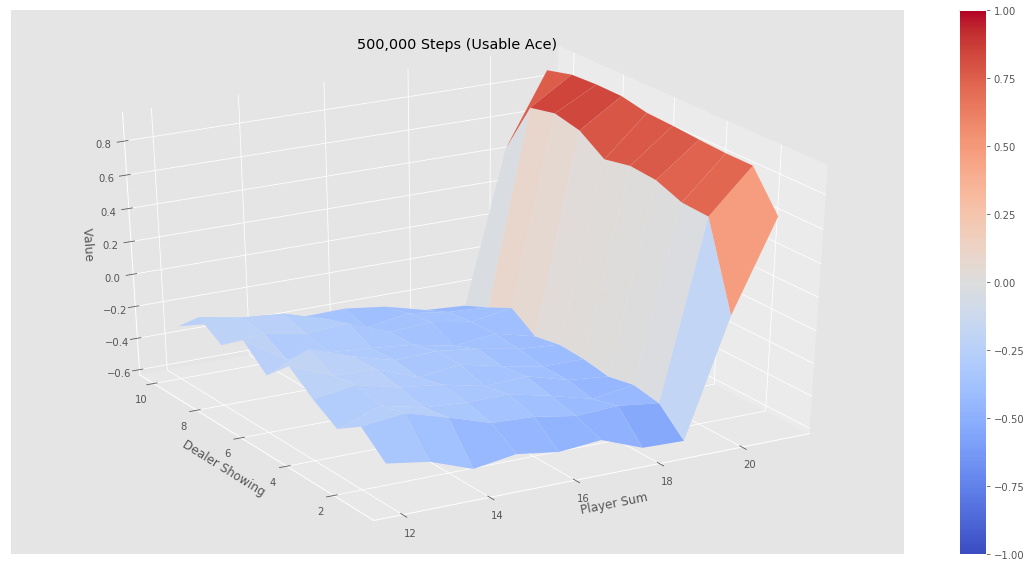

In [14]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")